In [7]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
iris = load_iris()
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns = columns )

In [9]:
irisDF['target'] = iris.target
irisDF

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


------
- caseno: 일련번호이다. (1부터 150까지 입력된다.)
- sepal_length:	꽃받침의 길이 정보이다.
- sepal_width:	꽃받침의 너비 정보이다.
- petal_length:	꽃잎의 길이 정보이다.
- petal_width:	꽃잎의 너비 정보이다.  
- species: 꽃의 종류 정보이다.  setosa / versicolor / virginica 의 3종류로 구분된다.

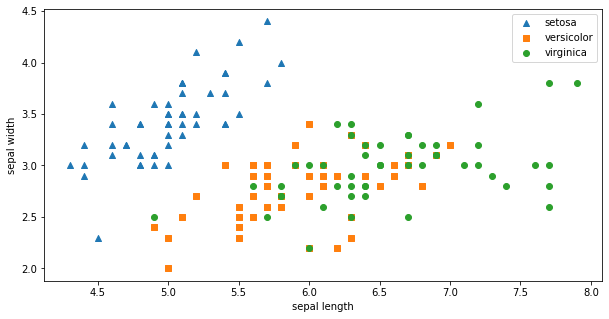

In [12]:
#setosa: 삼각, versicolor: 사각, virginica: 원
markers = ['^', 's','o']
plt.figure(figsize=(10,5))
#setosa:0, versicolor:1, virginica:2
for i, marker in enumerate(markers):
    x_axis_data= irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data= irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker =marker, label = iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

-------
- setosa품종은 sepal length가 6.0 이하이고 width가 3.0 이상인 곳에 일정하게 분포되어있는 것을 알 수 있다.
- versicolor와 virginica는 이 두가지 피처로는 분류가 어려운 복잡한 조건임을 알 수 있다.

# PCA(Principal Component Analysis)

- 4개의 속성을 2개로 압축하기

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) #차원의 수
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [17]:
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [18]:
pca_columns = ['pca_component1', 'pca_component2']
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)

In [19]:
irisDF_pca['target'] = irisDF['target']
irisDF_pca.head()

,pca_component1,pca_component2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


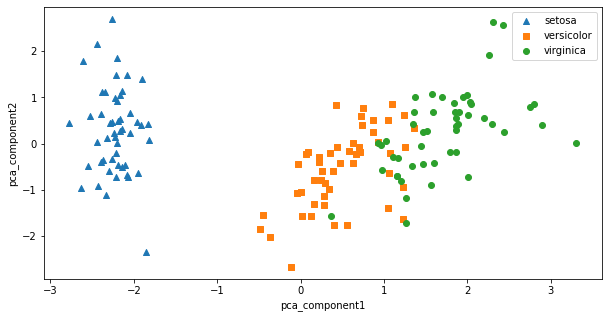

In [22]:
#setosa: 삼각, versicolor: 사각, virginica: 원
markers = ['^', 's','o']
plt.figure(figsize=(10,5))
#setosa:0, versicolor:1, virginica:2
for i, marker in enumerate(markers):
    x_axis_data= irisDF_pca[irisDF_pca['target']==i]['pca_component1']
    y_axis_data= irisDF_pca[irisDF_pca['target']==i]['pca_component2']
    plt.scatter(x_axis_data, y_axis_data, marker =marker, label = iris.target_names[i])

plt.legend()
plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.show()

-------
- pca_component1축을 기반으로 setosa 품종은 명확하게 구분 가능하다.
- versicolor와 virginica는 pca_component1축을 기반으로 서로 겹치는 부분이 일부 존재하지만 차원 축소 전 보다는 잘 구분된다.

--> pca_component1이 원본 데이터의 변동성을 잘 반영했다. 

<br>

- component별로 원본 데이터의 변동성을 얼마나 반영하고 있는지 확인

In [50]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.72962445 0.22850762]
0.9581320720000164


-----
- component1이 전체 변동성의 약 72.9%를 차지한다. 
- component2는 전체 변동성의 약 22.8%를 차지한다.


--> 따라서 pca를 2개의 요소로만 변환해도 원본 데이터의 변동성을 약 95.8%를 설명할 수 있다는 것이다.

<br><br>

# Modeling & Evaluation

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

In [37]:
rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=10)
print('원본 데이터 교차 검증 개별 정확도: ',scores)
print('원본 데이터 평균 정확도: ',np.mean(scores))

원본 데이터 교차 검증 개별 정확도:  [1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.86666667 1.         1.         1.        ]
원본 데이터 평균 정확도:  0.96


In [36]:
pca_X = irisDF_pca.iloc[:,:-1]
scores_pca = cross_val_score(rcf,pca_X, iris.target, scoring='accuracy', cv=10)
print('pca 변환 데이터 교차 검증 개별 정확도: ',scores_pca)
print('pca 변환 데이터 평균 정확도: ',np.mean(scores_pca))

pca 변환 데이터 교차 검증 개별 정확도:  [0.8        0.86666667 0.93333333 0.93333333 0.86666667 0.8
 0.86666667 0.86666667 1.         1.        ]
pca 변환 데이터 평균 정확도:  0.8933333333333333


----------
- 원본 데이터에 비해 속성 개수가 50% 감소(4개 -> 2개)
- 정확도는 원본 데이터에 비해 7% 감소(0.96 -> 0.89)

--> pca 변화 후에도 원본 데이터의 특성을 상당 부분 유지하고 있음을 알 수 있다.

<br><br>

# LDA(Linear Discriminant Analysis)

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [42]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)

In [43]:
print(iris_lda.shape)

(150, 2)


In [44]:
lda_columns = ['lda_component1', 'lda_component2']
irisDF_lda = pd.DataFrame(iris_lda, columns = lda_columns)
irisDF_lda['target'] = iris.target

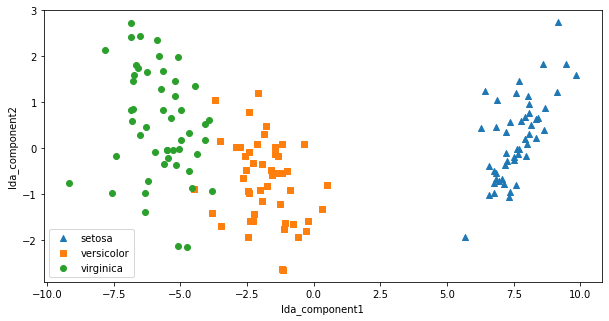

In [46]:
#setosa: 삼각, versicolor: 사각, virginica: 원
markers = ['^', 's','o']
plt.figure(figsize=(10,5))
#setosa:0, versicolor:1, virginica:2
for i, marker in enumerate(markers):
    x_axis_data= irisDF_lda[irisDF_pca['target']==i]['lda_component1']
    y_axis_data= irisDF_lda[irisDF_pca['target']==i]['lda_component2']
    plt.scatter(x_axis_data, y_axis_data, marker =marker, label = iris.target_names[i])

plt.legend()
plt.xlabel('lda_component1')
plt.ylabel('lda_component2')
plt.show()

------
- lda_component1 축을 기반으로 setosa는 확실히 구분된다.
- versicolor와 virginica도 pca를 적용했을 때 보다 더 잘 구분된다.

In [48]:
print(lda.explained_variance_ratio_)

[0.9912126 0.0087874]


In [49]:
sum(lda.explained_variance_ratio_)

0.9999999999999999

------
lda를 2개의 요소만으로 변환해도 원본데이터의 변동성을 약 99.9% 설명할 수 있다. 